In [251]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [252]:
data = pd.read_csv('DScasestudy.txt', delimiter ='\t')

In [253]:
data.shape

(530, 16563)

In [254]:
print(data.head())

   response  V1  V2  V3  V4  V5  V6  V7  V8  V9   ...    V16553  V16554  \
0         1   0   0   0   0   0   1   0   0   0   ...         1       0   
1         1   0   0   0   0   0   1   0   0   0   ...         0       0   
2         1   0   0   0   0   0   1   0   0   0   ...         0       0   
3         1   0   0   0   0   0   1   0   0   0   ...         0       0   
4         1   0   0   0   0   0   1   0   0   0   ...         0       0   

   V16555  V16556  V16557  V16558  V16559  V16560  V16561  V16562  
0       0       0       0       0       0       0       0       0  
1       0       0       0       0       0       0       0       1  
2       0       0       0       0       0       0       0       1  
3       0       0       0       0       0       0       0       0  
4       0       0       0       0       0       0       0       0  

[5 rows x 16563 columns]


In [255]:
data.apply(pd.value_counts)
#Check to make sure all columns oncly contain binary (0,1) data.  Also look for imbalance target class.  It appears as though 
#approx 77% of target data is 0 

,response,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16553,V16554,V16555,V16556,V16557,V16558,V16559,V16560,V16561,V16562
0,407,525,525,529,530.0,519,NaN,529,514,530.0,...,446,530.0,530.0,529,519,523,530.0,528,530.0,293
1,123,5,5,1,NaN,11,530.0,1,16,NaN,...,84,NaN,NaN,1,11,7,NaN,2,NaN,237


In [256]:
X = data.drop(['response'], axis=1)

In [257]:
y = data['response']

In [258]:
print(X.head())

   V1  V2  V3  V4  V5  V6  V7  V8  V9  V10   ...    V16553  V16554  V16555  \
0   0   0   0   0   0   1   0   0   0    0   ...         1       0       0   
1   0   0   0   0   0   1   0   0   0    0   ...         0       0       0   
2   0   0   0   0   0   1   0   0   0    0   ...         0       0       0   
3   0   0   0   0   0   1   0   0   0    0   ...         0       0       0   
4   0   0   0   0   0   1   0   0   0    0   ...         0       0       0   

   V16556  V16557  V16558  V16559  V16560  V16561  V16562  
0       0       0       0       0       0       0       0  
1       0       0       0       0       0       0       1  
2       0       0       0       0       0       0       1  
3       0       0       0       0       0       0       0  
4       0       0       0       0       0       0       0  

[5 rows x 16562 columns]


In [259]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: response, dtype: int64


In [260]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 13)
#create seperate training and test data sets

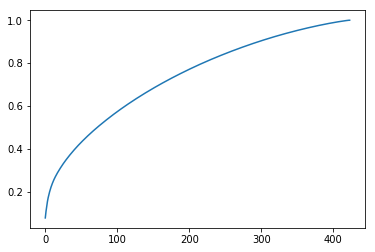

In [261]:
pca1 = PCA().fit(X_train)
plt.plot(np.cumsum(pca1.explained_variance_ratio_))
#We will determing n_components in our PCA model by attempting to retain 90% of the variance in the original data.  From this
#plot it appears that choosing 300 components would be adequate to retain approximately 90% of the variance.  

In [262]:
pca = PCA(n_components = 300)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
#apply PCA to training set and test set to reduce dimensionality from 16,562 features to 300 features

In [263]:
NaiveBayes = GaussianNB()
NaiveBayes.fit(X_train, y_train)
#create a Naive Bayes classification model

GaussianNB(priors=None)

In [264]:
y_pred = NaiveBayes.predict(X_test)

In [265]:
NaiveBayes.score(X_train, y_train)

0.8867924528301887

In [266]:
NaiveBayes.score(X_test, y_test)

0.7924528301886793

In [267]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[84  0]
 [22  0]]


In [268]:
#define fucntion to run a baseline score for classifiers using default hyperparameter values
def scores(models, X, y):
    for model in models:
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        print("Accuracy Score: {0:0.2f} %".format(acc * 100))

In [269]:
#classification models used with default hyperparameters
models = [LogisticRegression(random_state=13),
          KNeighborsClassifier(),
          SVC(random_state = 13),
          RandomForestClassifier(random_state = 13)]

In [270]:
for model in models:
    model.fit(X_train, y_train)
#fit training data to the 4 different models

In [271]:
scores(models, X_train, y_train)

Accuracy Score: 100.00 %
Accuracy Score: 79.01 %
Accuracy Score: 98.35 %
Accuracy Score: 99.06 %


In [272]:
scores(models, X_test, y_test)
#Initially it looks like Support Vector classifier with default linear parameters generalized fairly well

Accuracy Score: 79.25 %
Accuracy Score: 75.47 %
Accuracy Score: 83.02 %
Accuracy Score: 79.25 %


In [273]:
#define hyperparameters to be used during GridSearch
LR_grid_parameters = {'C': [0.1, 1, 10, 50], 'penalty': ['l1', 'l2'], 'random_state': [13]}
KNN_grid_parameters = {'n_neighbors': [3, 5, 10, 20], 'weights': ['uniform', 'distance']}
SVM_poly_grid_parameters = {'kernel': ['poly'], 'degree': [1, 2, 3, 4], 'gamma': [.5, .2, .05, .01, .001],
                            'C': [0.1, 1, 10, 50], 'random_state': [13]}
SVM_grid_parameters = {'kernel': ['linear', 'rbf', 'sigmoid'], 'gamma': [.5, .2, .05, .01, .001],
                       'C': [0.1, 1, 10, 50], 'random_state': [13]}
RF_grid_parameters = {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy'],
               'max_depth': [None, 10, 25, 50], 'random_state': [13]}

In [274]:
LR_grid = GridSearchCV(estimator = LogisticRegression(), param_grid = LR_grid_parameters, 
                        scoring = 'accuracy')
LR_grid.fit(X_train, y_train)
print("Best score: %0.3f" % LR_grid.best_score_)
print("Best parameters set:")
best_parameters=LR_grid.best_estimator_.get_params()
for param_name in sorted(LR_grid_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
#determine optimized hyperparameters for Logistic Regression Model

Best score: 0.835
Best parameters set:
	C: 0.1
	penalty: 'l1'
	random_state: 13


In [275]:
KNN_grid = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = KNN_grid_parameters, 
                        scoring = 'accuracy')
KNN_grid.fit(X_train, y_train)
print("Best score: %0.3f" % KNN_grid.best_score_)
print("Best parameters set:")
best_parameters=KNN_grid.best_estimator_.get_params()
for param_name in sorted(KNN_grid_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
#determine optimized hyperparameters for KNN model

Best score: 0.767
Best parameters set:
	n_neighbors: 10
	weights: 'uniform'


In [276]:
SVM_poly_grid = GridSearchCV(estimator = SVC(), param_grid = SVM_poly_grid_parameters, 
                             scoring = 'accuracy')
SVM_poly_grid.fit(X_train, y_train)
print("Best score: %0.3f" % SVM_poly_grid.best_score_)
print("Best parameters set:")
best_parameters=SVM_poly_grid.best_estimator_.get_params()
for param_name in sorted(SVM_poly_grid_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
#determine optimized hyperparameters for SVM Polynomial model

Best score: 0.847
Best parameters set:
	C: 0.1
	degree: 1
	gamma: 0.05
	kernel: 'poly'
	random_state: 13


In [277]:
SVM_grid = GridSearchCV(estimator = SVC(), param_grid = SVM_grid_parameters, 
                             scoring = 'accuracy')
SVM_grid.fit(X_train, y_train)
print("Best score: %0.3f" % SVM_grid.best_score_)
print("Best parameters set:")
best_parameters=SVM_grid.best_estimator_.get_params()
for param_name in sorted(SVM_grid_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
#determine optimized hyperparameters for SVM linear/kernel models

Best score: 0.840
Best parameters set:
	C: 10
	gamma: 0.001
	kernel: 'rbf'
	random_state: 13


In [278]:
RF_grid = GridSearchCV(estimator = RandomForestClassifier(), param_grid = RF_grid_parameters, 
                             scoring = 'accuracy')
RF_grid.fit(X_train, y_train)
print("Best score: %0.3f" % RF_grid.best_score_)
print("Best parameters set:")
best_parameters=RF_grid.best_estimator_.get_params()
for param_name in sorted(RF_grid_parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))
#determine optimized parameters for Random Forest model

Best score: 0.767
Best parameters set:
	criterion: 'gini'
	max_depth: None
	n_estimators: 50
	random_state: 13


In [279]:
LogReg = LogisticRegression(penalty= 'l1', C=.1, random_state = 13 )
LogReg.fit(X_train, y_train)
#Recreate Logistic Regression model with optimized pararameters.  Accuracy will be slightly different since data is not 
#cross validated

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=13, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [280]:
y_pred1 = LogReg.predict(X_test)

In [281]:
cm1 = confusion_matrix(y_test, y_pred1)

In [282]:
print(cm1)

[[78  6]
 [11 11]]


In [283]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.88      0.93      0.90        84
          1       0.65      0.50      0.56        22

avg / total       0.83      0.84      0.83       106



In [284]:
SVM_Poly = SVC(C = .1, degree = 1, gamma = .05, kernel = 'poly', random_state = 13)
SVM_Poly.fit(X_train, y_train)
#Recreate Support Vector Polynomial model with optimized pararameters.  Accuracy will be slightly different since data is not 
#cross validated

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=1, gamma=0.05, kernel='poly',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [285]:
y_pred2 = SVM_Poly.predict(X_test)

In [287]:
cm2 = confusion_matrix(y_test, y_pred2)
print(cm2)

[[78  6]
 [12 10]]


In [288]:
print(classification_report(y_test, y_pred2))

             precision    recall  f1-score   support

          0       0.87      0.93      0.90        84
          1       0.62      0.45      0.53        22

avg / total       0.82      0.83      0.82       106



In [289]:
SVM_rbf = SVC(C = 10, gamma = .001, kernel = 'rbf', random_state = 13)
SVM_rbf.fit(X_train, y_train)
#Recreate Support Vector RBF model with optimized pararameters.  Accuracy will be slightly different since data is not 
#cross validated

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=13, shrinking=True,
  tol=0.001, verbose=False)

In [290]:
y_pred3 = SVM_rbf.predict(X_test)

In [292]:
cm3 = confusion_matrix(y_test, y_pred3)
print(cm3)

[[76  8]
 [11 11]]


In [293]:
print(classification_report(y_test, y_pred3))

             precision    recall  f1-score   support

          0       0.87      0.90      0.89        84
          1       0.58      0.50      0.54        22

avg / total       0.81      0.82      0.82       106

